Inbal Kupperman 307930479
Evelyn Popok 207583683

In [224]:
import pandas as pd

# Q2

Loading Dataset

In [225]:
df = pd.read_csv('spam_ham_dataset.csv')

# Exploring the data:

In [226]:
df.shape

(5171, 4)

In [227]:
print(df)


      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

Checking for null values

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


* we see there are no null values in the text column.

Tokenization

In [229]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evely\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [230]:
#df["text_tokenized"]=word_tokenize(df["text"])
df["text_tokenized"] = df["text"].apply(word_tokenize)

In [231]:
print(df["text_tokenized"])

0       [Subject, :, enron, methanol, ;, meter, #, :, ...
1       [Subject, :, hpl, nom, for, january, 9, ,, 200...
2       [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3       [Subject, :, photoshop, ,, windows, ,, office,...
4       [Subject, :, re, :, indian, springs, this, dea...
                              ...                        
5166    [Subject, :, put, the, 10, on, the, ft, the, t...
5167    [Subject, :, 3, /, 4, /, 2000, and, following,...
5168    [Subject, :, calpine, daily, gas, nomination, ...
5169    [Subject, :, industrial, worksheets, for, augu...
5170    [Subject, :, important, online, banking, alert...
Name: text_tokenized, Length: 5171, dtype: object


# Q3 - EDA visualization

In [232]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style="seaborn")

In [233]:
df.head()

,Unnamed: 0,label,text,label_num,text_tokenized
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[Subject, :, enron, methanol, ;, meter, #, :, ..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[Subject, :, hpl, nom, for, january, 9, ,, 200..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[Subject, :, photoshop, ,, windows, ,, office,..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[Subject, :, re, :, indian, springs, this, dea..."


In [234]:
df.label.value_counts()
df.label_num.value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

Plotting the target-label value counts

In [235]:
ham = df[df.label_num == 0].shape[0]
spam = df[df.label_num == 1].shape[0]

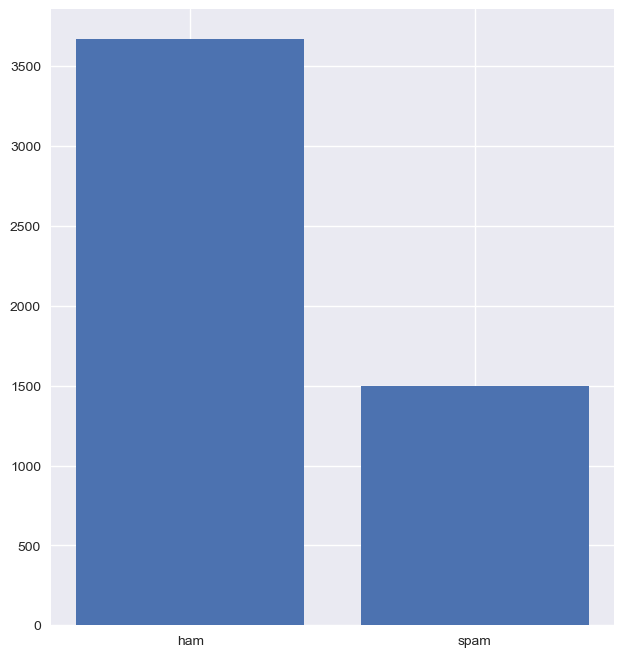

In [236]:
plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
_ = plt.bar(['ham', 'spam'], [ham, spam])

Plot structure:

In [237]:
def plot_target_based_features(feature):
    x1 = df[df.label_num == 0][feature]
    x2 = df[df.label_num == 1][feature]
    plt.figure(1, figsize=(8,8))
    plt.subplot(1,1,1)

    _ = plt.hist(x1, alpha=0.7, color="grey", bins=100)
    _ = plt.hist(x2, alpha=0.5, color="blue", bins=100)
    return _

Text length plot:

In [238]:
df["text_len"] = df.text.map(lambda x: len(x))

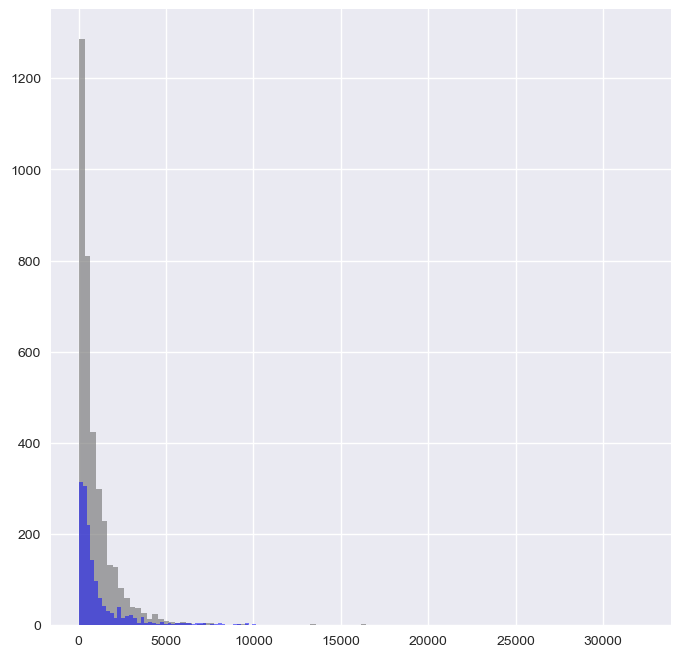

In [239]:
_ = plot_target_based_features("text_len")

* we can see that ham text length is longer than spam in most cases.

Words count plot:

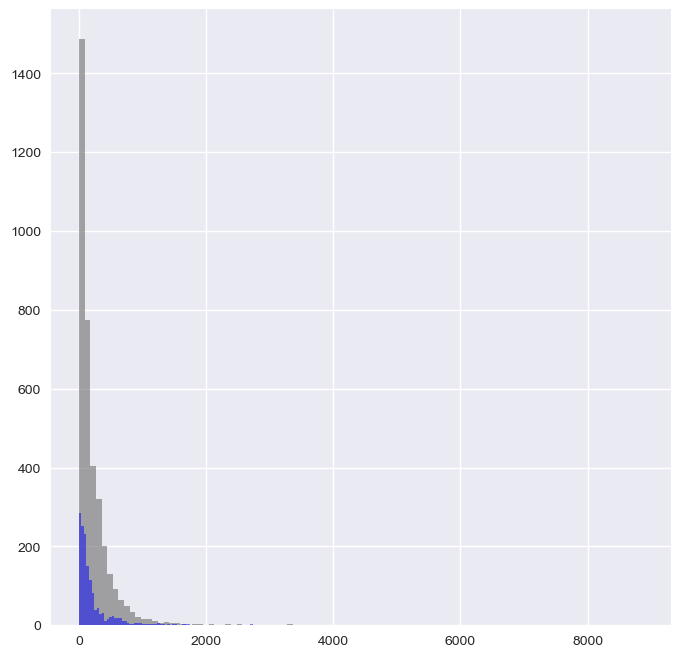

In [240]:
df["words_count"] = df.text.str.split().map(lambda x: len(x))
_ = plot_target_based_features("words_count")

* we can see that ham text is composed of more words than spam in most cases.

Unique word count plot:

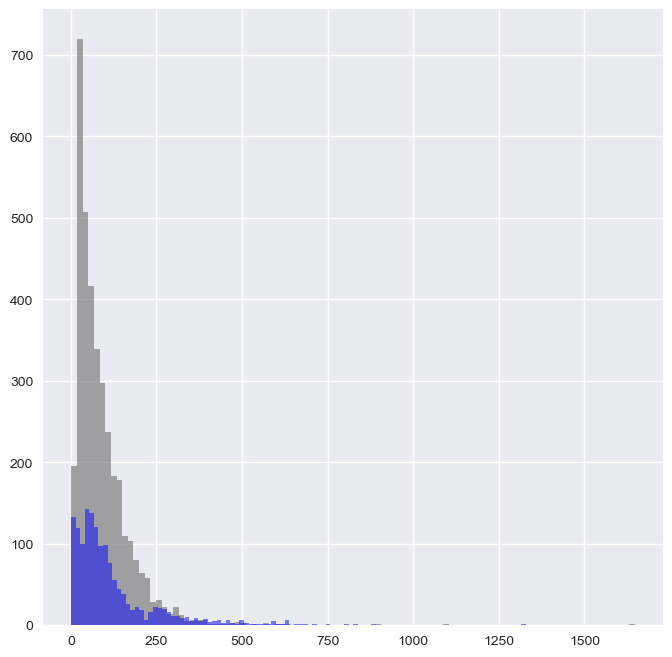

In [241]:
df["unique_word_count"] = df.text.map(lambda x: len(set(str(x).split())))
_ = plot_target_based_features("unique_word_count")

* we can see that spam text is composed of more special words than ham in most cases.

Mean word length plot:

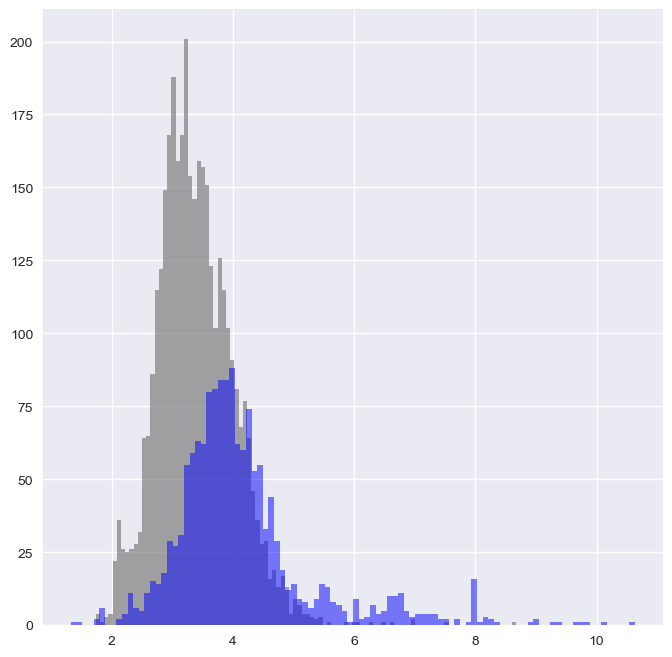

In [242]:
df['mean_word_length'] = df.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)
_ = plot_target_based_features("mean_word_length")

* we see that spam words are mostly longer that the words in the ham text.

Punctuation count plot:

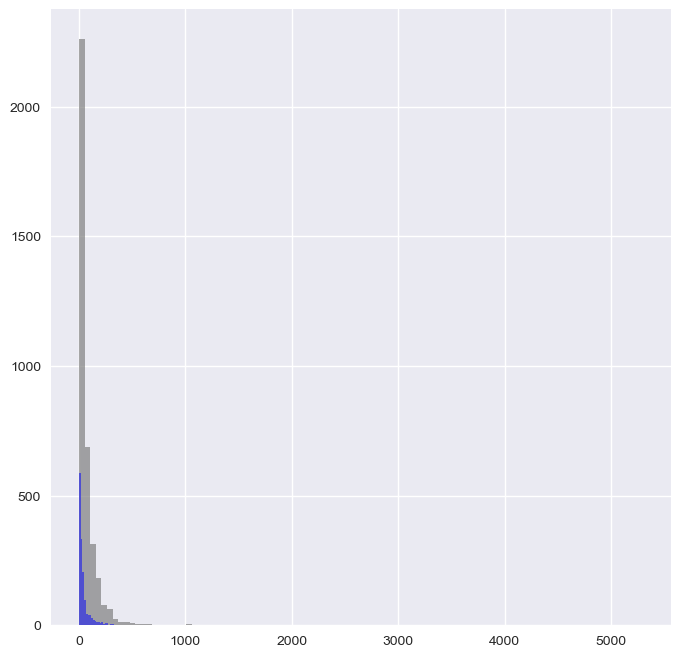

In [243]:
import string

df['punctuation_count'] = df["text"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)
_ = plot_target_based_features("punctuation_count")

* we see more punctuation in the ham text.

# Q4

Splitting the data into train and test

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [246]:
x_train = train["text"]
y_train = train["label_num"]
x_test = test["text"]
y_test = test["label_num"]

Feature extraction with TFIDF:

In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [248]:
vectorizer = TfidfVectorizer(stop_words="english")

In [249]:
tfidf_x_train = vectorizer.fit_transform(x_train)
tfidf_x_test = vectorizer.transform(x_test)
tfidf_x_train.shape

(4136, 44813)

Feature names:

In [250]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['00' '000' '0000' ... 'zzo' 'zzso' 'zzsyt']


# Q5 - building a classification model of lr

In [251]:
from sklearn.linear_model import LogisticRegression, LinearRegression


In [252]:
classifier = LogisticRegression(C=5, max_iter=1000)

In [253]:
classifier.fit(tfidf_x_train,y_train)

LogisticRegression(C=5, max_iter=1000)

In [254]:
test_prediction = classifier.predict(tfidf_x_test)

# Q6 - Evaluation

In [255]:
from sklearn import metrics

In [256]:
accuracy_tfidf_lr = metrics.accuracy_score(y_test,test_prediction)
print("accuracy:", accuracy_tfidf_lr)

accuracy: 0.9864734299516909


In [257]:
recall_tfidf_lr= metrics.recall_score(y_test,test_prediction)
print("recall:", recall_tfidf_lr)

recall: 0.9756944444444444


In [258]:
precision_tfidf_lr = metrics.precision_score(y_test,test_prediction)
print("precision:", precision_tfidf_lr)

precision: 0.9756944444444444


In [259]:
f1_score_tfidf_lr = metrics.f1_score(y_test,test_prediction)
print("f1_score:", f1_score_tfidf_lr)

f1_score: 0.9756944444444444


# Q7 -  5 more runs

TFIDF (from 4+5 as is) with DecisionTreeClassifier

In [260]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
classifier_DTC = DecisionTreeClassifier(random_state=2)

In [262]:
classifier_DTC.fit(tfidf_x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [263]:
test_prediction_DTC = classifier_DTC.predict(tfidf_x_test)

DTC Evaluation with TFIDF

In [264]:
accuracy_tfidf_DTC = metrics.accuracy_score(y_test, test_prediction_DTC)
print("accuracy:", accuracy_tfidf_DTC)
recall_tfidf_DTC = metrics.recall_score(y_test, test_prediction_DTC)
print("recall:", recall_tfidf_DTC)
precision_tfidf_DTC = metrics.precision_score(y_test, test_prediction_DTC)
print("precision:", precision_tfidf_DTC)
f1_score_tfidf_DTC = metrics.f1_score(y_test, test_prediction_DTC)
print("f1_score:", f1_score_tfidf_DTC)

accuracy: 0.9526570048309179
recall: 0.9166666666666666
precision: 0.9134948096885813
f1_score: 0.9150779896013864


LinearRegression with TFIDF

In [265]:
from sklearn.linear_model import LinearRegression
classifier_linear = LinearRegression()

In [266]:
classifier_linear.fit(tfidf_x_train,y_train)

LinearRegression()

In [267]:
test_prediction_linear = classifier_linear.predict(tfidf_x_test)

LinearRegression - Evaluation

In [268]:
test_prediction_linear[test_prediction_linear > 0.5] = 1
test_prediction_linear[test_prediction_linear <= 0.5] = 0
accuracy_tfidf_linear = metrics.accuracy_score(y_test, test_prediction_linear)
print("accuracy:", accuracy_tfidf_linear)
recall_tfidf_linear = metrics.recall_score(y_test, test_prediction_linear)
print("recall:", recall_tfidf_linear)
precision_tfidf_linear = metrics.precision_score(y_test, test_prediction_linear)
print("precision:", precision_tfidf_linear)
f1_score_tfidf_linear = metrics.f1_score(y_test, test_prediction_linear)
print("f1_score:", f1_score_tfidf_linear)

accuracy: 0.9565217391304348
recall: 0.8680555555555556
precision: 0.9727626459143969
f1_score: 0.9174311926605505


KNN classifier with TFIDF

In [269]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors=7)

In [270]:
classifier_KNN.fit(tfidf_x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [271]:
test_prediction_KNN = classifier_KNN.predict(tfidf_x_test)

C:\Users\evely\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [272]:
accuracy_tfidf_knn = metrics.accuracy_score(y_test, test_prediction_KNN)
print("accuracy:", accuracy_tfidf_knn)
recall_tfidf_knn = metrics.recall_score(y_test, test_prediction_KNN)
print("recall:", recall_tfidf_knn)
precision_tfidf_knn = metrics.precision_score(y_test, test_prediction_KNN)
print("precision:", precision_tfidf_knn)
f1_score_tfidf_knn = metrics.f1_score(y_test, test_prediction_KNN)
print("f1_score:", f1_score_tfidf_knn)

accuracy: 0.9584541062801932
recall: 0.8715277777777778
precision: 0.9766536964980544
f1_score: 0.9211009174311926


# Bag of words

In [273]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow = CountVectorizer(stop_words="english")
bow_x_train = vectorizer_bow.fit_transform(x_train)
bow_x_test = vectorizer_bow.transform(x_test)
print(vectorizer_bow.get_feature_names())

['00', '000', '0000', '000000', '000000000002858', '000000000049773', '000080', '000099', '0001', '00018', '00020608', '0004', '0005', '0008', '001', '001001', '0012', '001452', '002', '00221', '0025', '0027', '00298', '003', '0030', '003002', '0031', '0033', '0038', '004', '0042', '0043', '0044', '0045', '0046', '0047', '0049', '005', '00501723', '0051', '006', '006600', '0067', '007', '0071', '0074', '008', '0080', '0085201238', '009', '0090', '01', '010', '0100', '0101', '011', '012', '012603', '013', '0130', '014', '01408304990', '01474', '015', '016', '017', '0170', '01778', '0182', '0184', '019', '019017', '02', '020', '0200', '021', '022', '0232', '024', '025', '0255', '025648', '026', '027', '028', '02886', '029', '03', '030', '0300', '0310041', '03149', '0325567', '033', '0331', '034', '0347', '035', '0357', '036', '0361770', '0363', '036474336', '037', '0373', '0375', '038', '0380', '039', '0393', '0398', '04', '040', '0400', '04005', '0401', '0413', '0416', '042', '0424040',

C:\Users\evely\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [274]:
df_bow_sklearn = pd.DataFrame(bow_x_train.toarray(),columns=vectorizer_bow.get_feature_names())
df_bow_sklearn.head()

,00,000,0000,000000,000000000002858,000000000049773,000080,000099,0001,00018,...,zyjvit,zynsdirnh,zynve,zyqtaqlt,zyrtec,zyyqywp,zzn,zzo,zzso,zzsyt
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bag of words with LogisticRegression

In [275]:
classifier = LogisticRegression(C=5, max_iter=1000)
classifier.fit(bow_x_train, y_train)
test_prediction_bow = classifier.predict(bow_x_test)

 Bag of words with LogisticRegression - Evaluation

In [276]:
accuracy_bow_lr = metrics.accuracy_score(y_test, test_prediction_bow)
print("accuracy:", accuracy_bow_lr)
recall_bow_lr = metrics.recall_score(y_test, test_prediction_bow)
print("recall:", recall_bow_lr)
precision_bow_lr = metrics.precision_score(y_test, test_prediction_bow)
print("precision:", precision_bow_lr)
f1_score_bow_lr = metrics.f1_score(y_test, test_prediction_bow)
print("f1_score:", f1_score_bow_lr)

accuracy: 0.9816425120772947
recall: 0.9756944444444444
precision: 0.9590443686006825
f1_score: 0.9672977624784853


DTC with Bag of words

In [277]:
from sklearn.tree import DecisionTreeClassifier

classifier_DTC = DecisionTreeClassifier(random_state=30)
classifier_DTC.fit(bow_x_train, y_train)
test_prediction_DTC = classifier_DTC.predict(bow_x_test)

accuracy_bow_dtc = metrics.accuracy_score(y_test, test_prediction_DTC)
print("accuracy:", accuracy_bow_dtc)
recall_bow_dtc = metrics.recall_score(y_test, test_prediction_DTC)
print("recall:", recall_bow_dtc)
precision_bow_dtc = metrics.precision_score(y_test, test_prediction_DTC)
print("precision:", precision_bow_dtc)
f1_score_bow_dtc = metrics.f1_score(y_test, test_prediction_DTC)
print("f1_score:", f1_score_bow_dtc)

accuracy: 0.9594202898550724
recall: 0.9409722222222222
precision: 0.9155405405405406
f1_score: 0.928082191780822


# Q8 - Evaluation table

In [278]:
matrix_scores = [[accuracy_tfidf_lr,recall_tfidf_lr,precision_tfidf_lr,f1_score_tfidf_lr],
 [accuracy_tfidf_DTC,recall_tfidf_DTC,precision_tfidf_DTC,f1_score_tfidf_DTC],
 [accuracy_tfidf_linear,recall_tfidf_linear,precision_tfidf_linear,f1_score_tfidf_linear],
 [accuracy_tfidf_knn,recall_tfidf_knn,precision_tfidf_knn,f1_score_tfidf_knn],
[accuracy_bow_lr,recall_bow_lr,precision_bow_lr,f1_score_bow_lr],
[accuracy_bow_dtc,recall_bow_dtc,precision_bow_dtc,f1_score_bow_dtc]]
print(matrix_scores)


[[0.9864734299516909, 0.9756944444444444, 0.9756944444444444, 0.9756944444444444], [0.9526570048309179, 0.9166666666666666, 0.9134948096885813, 0.9150779896013864], [0.9565217391304348, 0.8680555555555556, 0.9727626459143969, 0.9174311926605505], [0.9584541062801932, 0.8715277777777778, 0.9766536964980544, 0.9211009174311926], [0.9816425120772947, 0.9756944444444444, 0.9590443686006825, 0.9672977624784853], [0.9594202898550724, 0.9409722222222222, 0.9155405405405406, 0.928082191780822]]


In [279]:
df_scores = pd.DataFrame(matrix_scores,
                         index=['TFIDF+LR', 'TFIDF+Linear', 'TFIDF+DTC', 'TFIDF+knn', 'BOW+LR','BOW+DTC'],
                         columns=['accuracy','recall','precision','f1-score'])
print("Scores dataframe:")
print(df_scores)

Scores dataframe:
              accuracy    recall  precision  f1-score
TFIDF+LR      0.986473  0.975694   0.975694  0.975694
TFIDF+Linear  0.952657  0.916667   0.913495  0.915078
TFIDF+DTC     0.956522  0.868056   0.972763  0.917431
TFIDF+knn     0.958454  0.871528   0.976654  0.921101
BOW+LR        0.981643  0.975694   0.959044  0.967298
BOW+DTC       0.959420  0.940972   0.915541  0.928082


# Q9

The best run from all combos we tried was the TFIDF with Logistic regression.
This run provided us with the highest F1 score and is a bit higher than the BOW run with Logistic regression.
In conclusion, we see that Logistic Regression works best for NLP with both feature extraction methods we used.
The Logistic regression supports categorizing data into separate classes by studying the relationship from a given set of labelled data and uses a Sigmoid function to do that. This model allows a simple and easy classification while still being effective on the data set.
We can say that TFIDF worked better with the LR than the BOW because it has a normalized count and not like the bow that counts every word.